<a href="https://colab.research.google.com/github/Series-Parallel/Machine_in_Deep_Learning/blob/main/Simple_Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

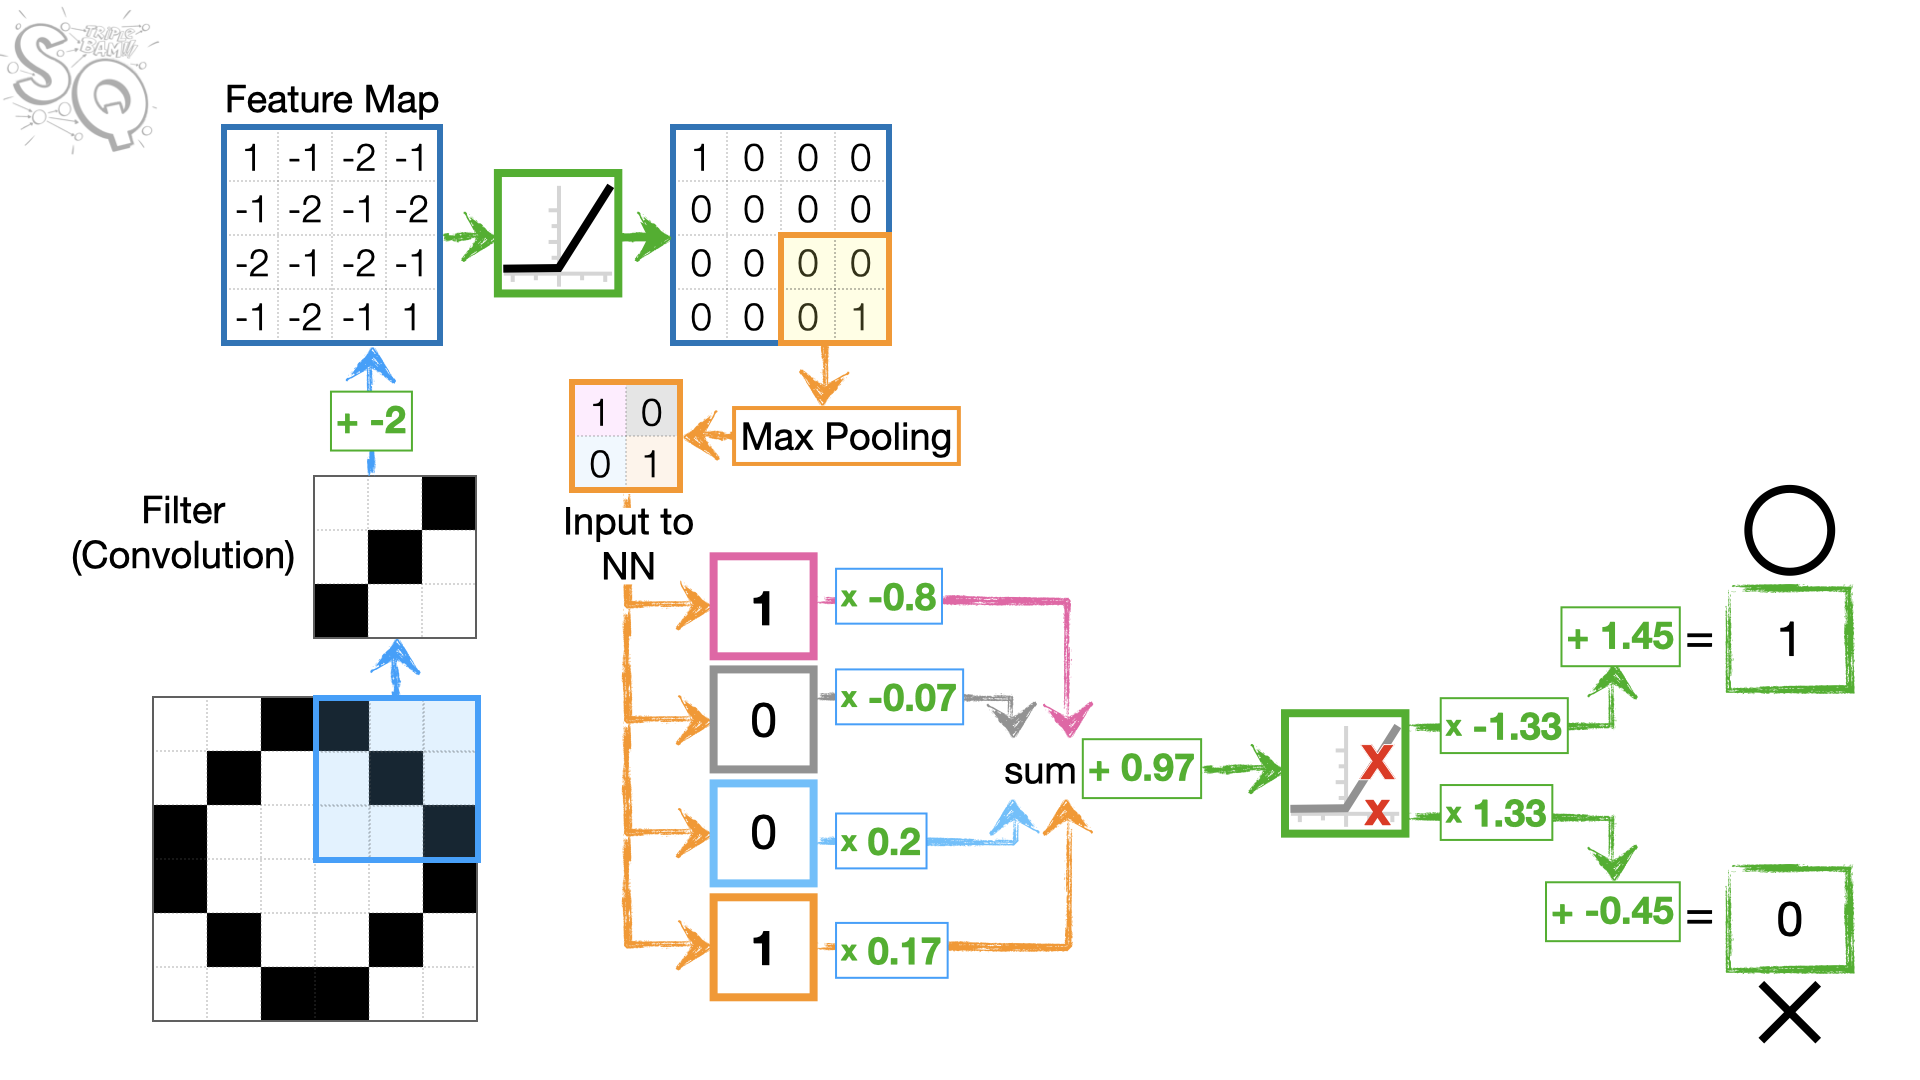

In [ ]:
!pip install lightning > /dev/null

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam

import lightning as L
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt

# Creating images and then building DataLoader from Scaratch

we'll create an image of the letters O and X that look like the pictures below.
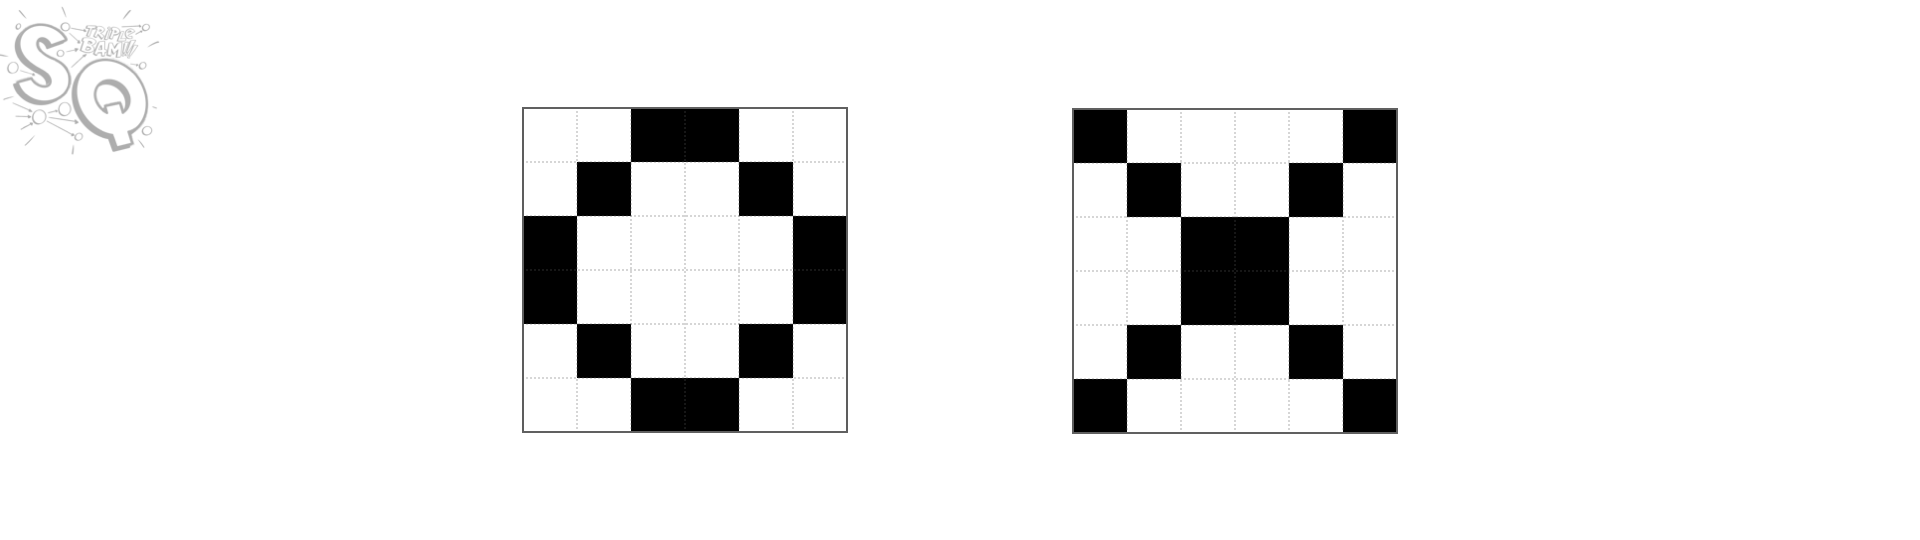

In [ ]:
o_image = [[0, 0, 1, 1, 0, 0],
           [0, 1, 0, 0, 1, 0],
           [1, 0, 0, 0, 0, 1],
           [1, 0, 0, 0, 0, 1],
           [0, 1, 0, 0, 1, 0],
           [0, 0, 1, 1, 0, 0]]

In [ ]:
x_image = [[1, 0, 0, 0, 0, 1],
           [0, 1, 0, 0, 1, 0],
           [0, 0, 1, 1, 0, 0],
           [0, 0, 1, 1, 0, 0],
           [0, 1, 0, 0, 1, 0],
           [1, 0, 0, 0, 0, 1]]

In [ ]:
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

axarr[0].imshow(o_image, cmap='gray_r')
axarr[1].imshow(x_image, cmap='gray_r')

* **O** is [1, 0]
* **X** is [0, 1]

In [ ]:
input_images = torch.tensor([o_image, x_image]).type(torch.float32)

In [ ]:
input_labels = torch.tensor([[1.0, 0.0], [0.0, 1.0]])

In [ ]:
dataset = TensorDataset(input_images, input_labels)
dataloader = DataLoader(dataset)

In [ ]:
for batch_num, (images, labels) in enumerate(dataloader):
    print("batch_num:", batch_num)
    print(images)
    print(labels)
    print()

# Building a convolutional neural network with PyTorch and Lightning

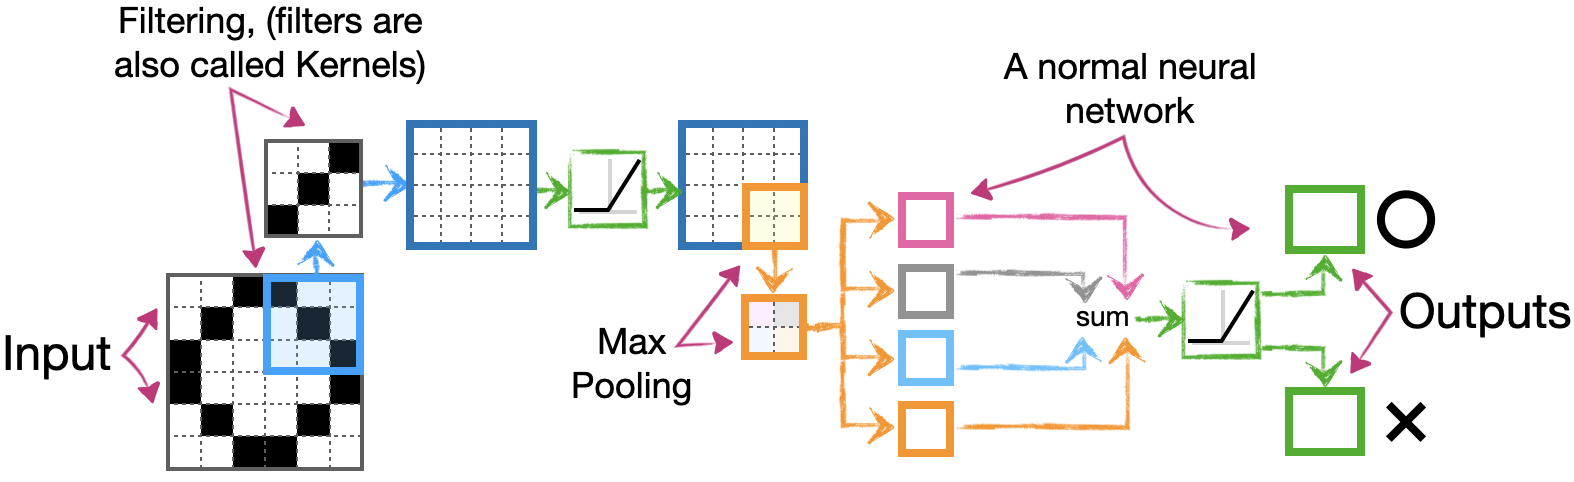

In [ ]:
class SimpleCNN(L.LightningModule):

  def __init__(self):

    super().__init__()

    L.seed_everything(seed=42)

    self.conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)

    self.pool = nn.MaxPool2d(kernel_size=2, stride = 2)

    self.input_to_hidden = nn.Linear(in_features=4, out_features=1)

    self.hidden_to_output = nn.Linear(in_features=1, out_features=2)

    self.loss = nn.CrossEntropyLoss()

  def forward(self, x):
    # Reshape the input tensor to be 2D image-like
    x = x.view(-1, 1, 6, 6) # Assuming the images are 6x6 and the batch size is determined automatically

    x = self.conv(x)
    x = F.relu(x)
    x = self.pool(x)
    x = torch.flatten(x, 1)

    x = self.input_to_hidden(x)
    x = F.relu(x)
    x = self.hidden_to_output(x)

    return x

  def configure_optimizers(self):
    return Adam(self.parameters(), lr=0.001)

  def training_step(self, batch, batch_idx):
    inputs, labels = batch
    outputs = self.forward(inputs)
    loss = self.loss(outputs, labels)

    return loss

# Training our Neural Network

In [ ]:
model = SimpleCNN()

In [ ]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(model, train_dataloaders=dataloader)

In [ ]:
for batch_num, (image, label) in enumerate(dataloader):
  prediction = model(image)
  predicted_label = torch.round(torch.softmax(prediction, dim=1), decimals=2)
  print("predicted_label:", predicted_label)
  print("original label:", label)
  print("\n")

In [ ]:
path_to_checkpoint = trainer.checkpoint_callback.best_model_path

In [ ]:
trainer = L.Trainer(max_epochs=700)
trainer.fit(model, train_dataloaders=dataloader, ckpt_path=path_to_checkpoint)

In [ ]:
for batch_num, (image, label) in enumerate(dataloader):
  prediction = model(image)
  predicted_label = torch.round(torch.softmax(prediction, dim=1), decimals=2)
  print("predicted_label:", predicted_label)
  print("original label:", label)
  print("\n")

# Making a Prediction with New Data

In [ ]:
shifted_x_image = [[0, 1, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 1],
                   [0, 0, 0, 1, 1, 0],
                   [0, 0, 0, 1, 1, 0],
                   [0, 0, 1, 0, 0, 1],
                   [0, 1, 0, 0, 0, 0]]

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.imshow(shifted_x_image, cmap='gray_r')

In [ ]:
prediction = model(torch.tensor([shifted_x_image]).type(torch.float32))

In [ ]:
predicted_label = torch.round(torch.softmax(prediction, dim=1), decimals=2)

In [ ]:
predicted_label